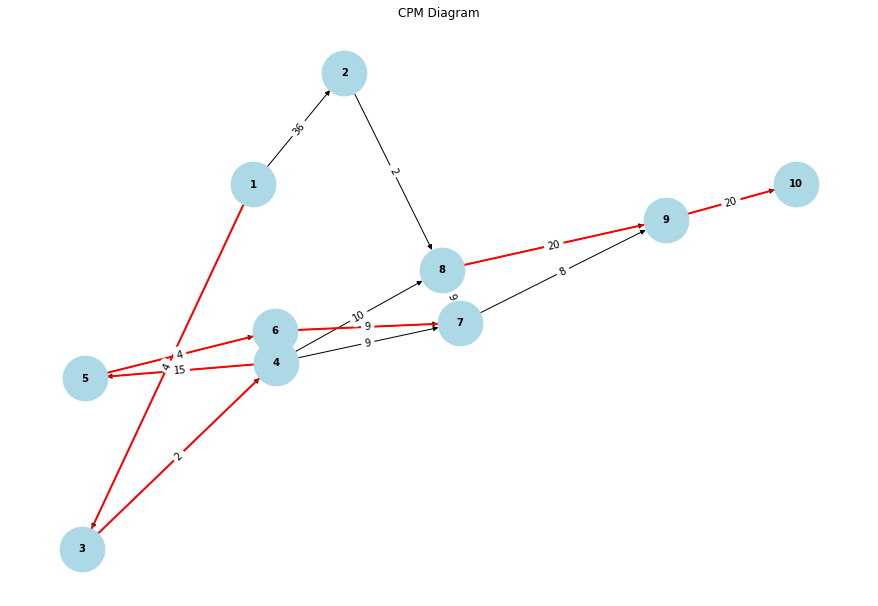

Critical Path: ['1', '3', '4', '5', '6', '7', '8', '9', '10'] with duration 83


In [8]:
from vrorRCC.cpm import *

graph = create_graph()
add_event(graph, '1', {})
add_event(graph, '2', {'1': 36})
add_event(graph, '3', {'1': 4})
add_event(graph, '8', {'2': 2})
add_event(graph, '4', {'3': 2})
add_event(graph, '5', {'4': 15})
add_event(graph, '7', {'4': 9})
add_event(graph, '8', {'4': 10})
add_event(graph, '6', {'5': 4})
add_event(graph, '7', {'6': 9})
add_event(graph, '8', {'7': 9})
add_event(graph, '9', {'7': 8})
add_event(graph, '9', {'8': 20})
add_event(graph, '10', {'9': 20})



visualize_graph(graph)
critical_path, length = find_critical_path(graph)
print(f"Critical Path: {critical_path} with duration {length}")

In [1]:
import networkx as ntk
import matplotlib.pyplot as plot
import pandas as pd


def create_graph():
    return ntk.DiGraph()

def add_event(graph, task, dependencies={}):
    if task not in graph:
        graph.add_node(task)
    for dep, duration in dependencies.items():
        if dep not in graph:
            graph.add_node(dep)
        graph.add_edge(dep, task, weight=duration)
       
def create_dynamic_events(event_data):
    graph = create_graph()
   
    # Add events based on the provided dictionary
    for event, dependencies in event_data.items():
        add_event(graph, event, dependencies)
   
    return graph

def find_critical_path(graph):
    critical_path = ntk.dag_longest_path(graph, weight='weight')
    critical_path_length = ntk.dag_longest_path_length(graph, weight='weight')
    return critical_path, critical_path_length

def visualize_graph(graph):
    pos = ntk.spring_layout(graph)
    plot.figure(figsize=(12, 8))
   
    ntk.draw(graph, pos, with_labels=True, node_size=2000, node_color='lightblue', font_size=10, font_weight='bold')
   
    edge_labels = {(u, v): f'{d["weight"]}' for u, v, d in graph.edges(data=True)}
    ntk.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels)
   
    critical_path, _ = find_critical_path(graph)
    ntk.draw_networkx_edges(graph, pos, edgelist=list(zip(critical_path, critical_path[1:])), edge_color='r', width=2)
   
    plot.title("CPM Diagram")
    plot.show()



def compute_te(activities):
    data = []
    for activity, to, tl, tp in activities:
        te = (to + 4 * tl + tp) / 6
        data.append({'Activity': activity, 'TE': te})
   
    df = pd.DataFrame(data)
    return print(df.to_string(index=False))


input_ = [("1-2",6,9,18),("1-3",5,8,17),("3-4",4,7,16),("2-4",4,7,22),("2-5",4,7,10),("3-5",2,5,8),("4-5",4,10,22)]
compute_te(input_)



event_data = {
    '1': {},
    '2': {'1': 10},  
    '3': {'1': 9},
    '4': {'2': 9, '3': 8},  
    '5': {'2': 7, '3': 5, '4': 11}
}


graph = create_dynamic_events(event_data)


critical_path, length = find_critical_path(graph)
print(f"Critical Path: {critical_path} with duration {length}")

Activity    TE
     1-2  10.0
     1-3   9.0
     3-4   8.0
     2-4   9.0
     2-5   7.0
     3-5   5.0
     4-5  11.0
Critical Path: ['1', '2', '4', '5'] with duration 30


Activity         TE
     1-2   8.166667
     1-3   6.666667
     1-4   7.166667
     4-5   6.000000
     5-6   4.833333
     3-6  10.000000
     3-7  10.000000
     2-6   8.333333
     6-8  10.333333
     7-8   8.166667


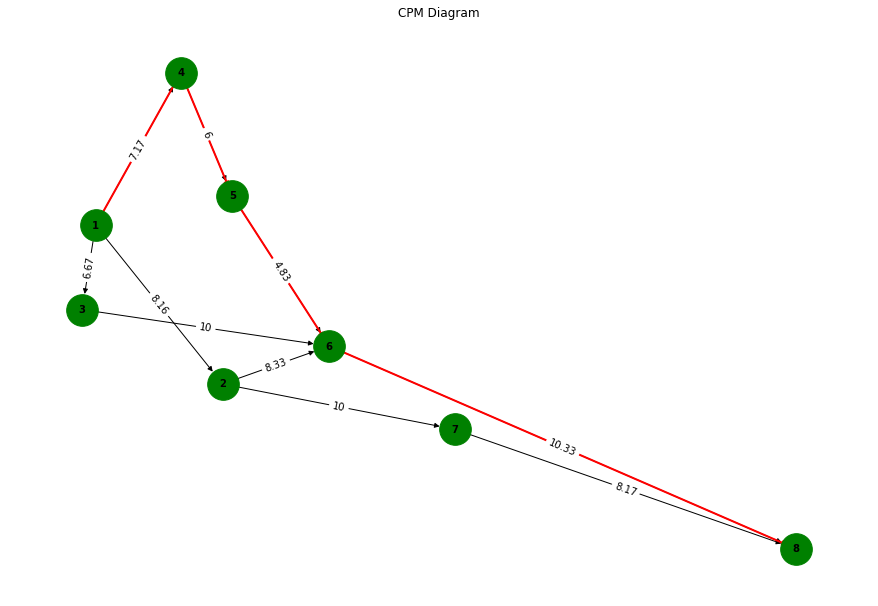

Critical Path: ['1', '4', '5', '6', '8'] with duration 28.33


In [2]:
import networkx as ntk
import matplotlib.pyplot as plot
import pandas as pd


def create_graph():
    return ntk.DiGraph()

def add_event(graph, task, dependencies={}):
    if task not in graph:
        graph.add_node(task)
    for dep, duration in dependencies.items():
        if dep not in graph:
            graph.add_node(dep)
        graph.add_edge(dep, task, weight=duration)
       
def create_dynamic_events(event_data):
    graph = create_graph()
   
    # Add events based on the provided dictionary
    for event, dependencies in event_data.items():
        add_event(graph, event, dependencies)
   
    return graph

def find_critical_path(graph):
    critical_path = ntk.dag_longest_path(graph, weight='weight')
    critical_path_length = ntk.dag_longest_path_length(graph, weight='weight')
    return critical_path, critical_path_length

def visualize_graph(graph):
    pos = ntk.spring_layout(graph)
    plot.figure(figsize=(12, 8))
   
    ntk.draw(graph, pos, with_labels=True, node_size=1000, node_color='green', font_size=10, font_weight='bold')
   
    edge_labels = {(u, v): f'{d["weight"]}' for u, v, d in graph.edges(data=True)}
    ntk.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels)
   
    critical_path, _ = find_critical_path(graph)
    ntk.draw_networkx_edges(graph, pos, edgelist=list(zip(critical_path, critical_path[1:])), edge_color='r', width=2)
   
    plot.title("CPM Diagram")
    plot.show()



def compute_te(activities):
    data = []
    for activity, to, tl, tp in activities:
        te = (to + 4 * tl + tp) / 6
        data.append({'Activity': activity, 'TE': te})
   
    df = pd.DataFrame(data)
    return print(df.to_string(index=False))


input_ = [("1-2",6,8,11),("1-3",3,7,9),("1-4",5,7,10),("4-5",4,6,8),("5-6",3,5,6),("3-6",8,10,12),("3-7",8,10,12),("2-6",4,8,14),("6-8",7,10,15),("7-8",5,8,12)]
compute_te(input_)



event = {
    '1': {},  
    '2': {'1': 8.16},  
    '3': {'1': 6.67},  
    '4': {'1': 7.17},
    '5': {'4': 6},
    '6': {'2': 8.33, '3': 10, '5': 4.83},  
    '7': {'2': 10},
    '8': {'7': 8.17, '6': 10.33}
}


graph = create_dynamic_events(event)

visualize_graph(graph)

critical_path, length = find_critical_path(graph)
print(f"Critical Path: {critical_path} with duration {length}")

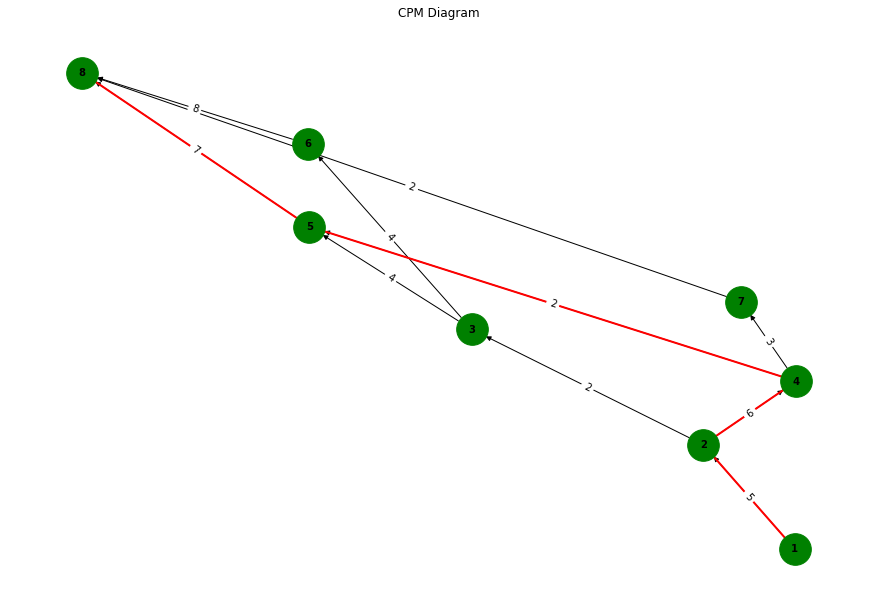

Critical Path: ['1', '2', '4', '5', '8'] with duration 20


In [3]:
event = {
    '1': {},  
    '2': {"1": 5},  
    '3': {"2": 2},  
    '4': {"2": 6},
    '5': {"3": 4,"4":2},
    '6': {"3": 4},
    '7': {"4":3},
    '8': {"5":7,"7":2, "6":8},  
   
 }

graph = create_dynamic_events(event)

visualize_graph(graph)

critical_path, length = find_critical_path(graph)
print(f"Critical Path: {critical_path} with duration {length}")

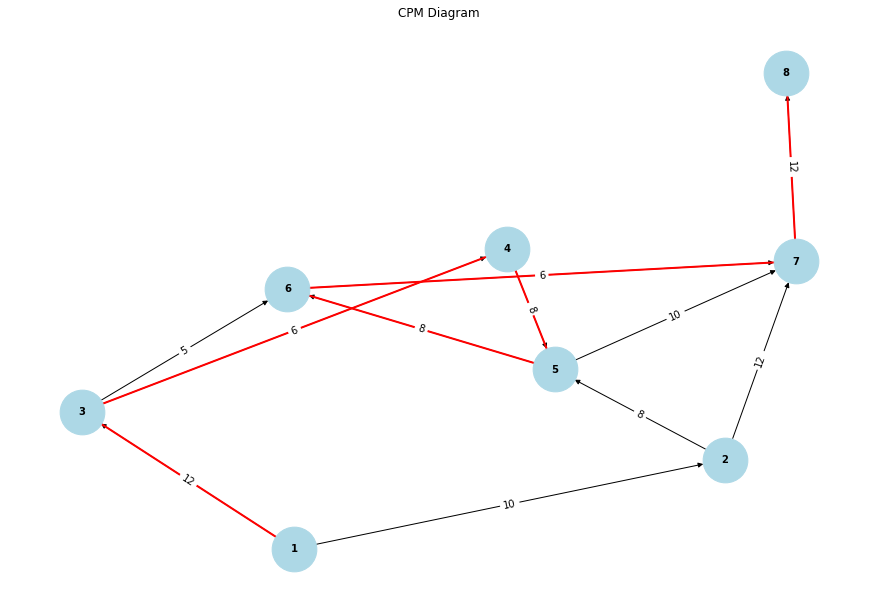

Critical Path: ['1', '3', '4', '5', '6', '7', '8'] with duration 52


In [9]:
from vrorRCC.cpm import *

graph = create_graph()
add_event(graph, '1', {})
add_event(graph, '2', {'1': 10})
add_event(graph, '3', {'1': 12})  
add_event(graph, '4', {'3': 6})  
add_event(graph, '5', {'4': 8,'2':8})
add_event(graph, '6', {'3': 5,'5':8})
add_event(graph, '7', {'2': 12,'5':10,'6':6})  
add_event(graph, '8', {'7': 12})  

visualize_graph(graph)
critical_path, length = find_critical_path(graph)
print(f"Critical Path: {critical_path} with duration {length}")

Activity    TE
     1-2   8.0
     2-3   4.0
     2-4  12.0
     3-5   5.0
     4-5   0.0
     4-6   6.0
     5-7   6.0
     5-8   6.0
     8-9   5.0
     7-9   8.0
    6-10   6.0
    9-10  10.0


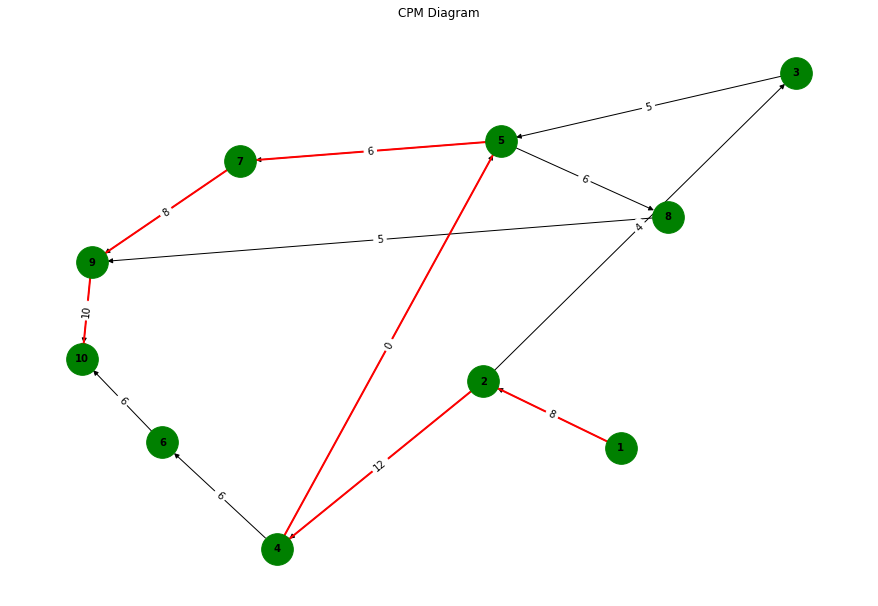

Critical Path: ['1', '2', '4', '5', '7', '9', '10'] with duration 44


In [13]:
import networkx as ntk
import matplotlib.pyplot as plot
import pandas as pd


def create_graph():
    return ntk.DiGraph()

def add_event(graph, task, dependencies={}):
    if task not in graph:
        graph.add_node(task)
    for dep, duration in dependencies.items():
        if dep not in graph:
            graph.add_node(dep)
        graph.add_edge(dep, task, weight=duration)
       
def create_dynamic_events(event_data):
    graph = create_graph()
   
    # Add events based on the provided dictionary
    for event, dependencies in event_data.items():
        add_event(graph, event, dependencies)
   
    return graph

def find_critical_path(graph):
    critical_path = ntk.dag_longest_path(graph, weight='weight')
    critical_path_length = ntk.dag_longest_path_length(graph, weight='weight')
    return critical_path, critical_path_length

def visualize_graph(graph):
    pos = ntk.spring_layout(graph)
    plot.figure(figsize=(12, 8))
   
    ntk.draw(graph, pos, with_labels=True, node_size=1000, node_color='green', font_size=10, font_weight='bold')
   
    edge_labels = {(u, v): f'{d["weight"]}' for u, v, d in graph.edges(data=True)}
    ntk.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels)
   
    critical_path, _ = find_critical_path(graph)
    ntk.draw_networkx_edges(graph, pos, edgelist=list(zip(critical_path, critical_path[1:])), edge_color='r', width=2)
   
    plot.title("CPM Diagram")
    plot.show()



def compute_te(activities):
    data = []
    for activity, to, tl, tp in activities:
        te = (to + 4 * tl + tp) / 6
        data.append({'Activity': activity, 'TE': te})
   
    df = pd.DataFrame(data)
    return print(df.to_string(index=False))


input_ = [("1-2",4,8,12),("2-3",1,4,7),("2-4",8,12,16),("3-5",3,5,7),("4-5",0,0,0),("4-6",3,6,9),("5-7",3,6,9),("5-8",4,6,8),("8-9",2,5,8),("7-9",4,8,12),("6-10",4,6,8),("9-10",4,10,16)]
compute_te(input_)



event = {
    '1': {},  
    '2': {'1': 8},  
    '3': {'2': 4},  
    '4': {'2': 12},
    '5': {'3': 5, '4': 0},
    '6': {'4': 6},  
    '7': {'5': 6},
    '8': {'5': 6},
    '9': {'7': 8, '8': 5},
   '10': {'6': 6, '9': 10}
}


graph = create_dynamic_events(event)

visualize_graph(graph)

critical_path, length = find_critical_path(graph)
print(f"Critical Path: {critical_path} with duration {length}")

